In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/airline-dataset/Airline Dataset.csv', parse_dates=['Departure Date'])
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Bay Pencost,On Time


In [2]:
df.nunique()

Passenger ID            59871
First Name               8437
Last Name               41658
Gender                      2
Age                        90
Nationality               240
Airport Name             9062
Airport Country Code      235
Country Name              235
Airport Continent           6
Continents                  6
Departure Date            364
Arrival Airport          9024
Pilot Name              98610
Flight Status               3
dtype: int64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Age', ylabel='Density'>

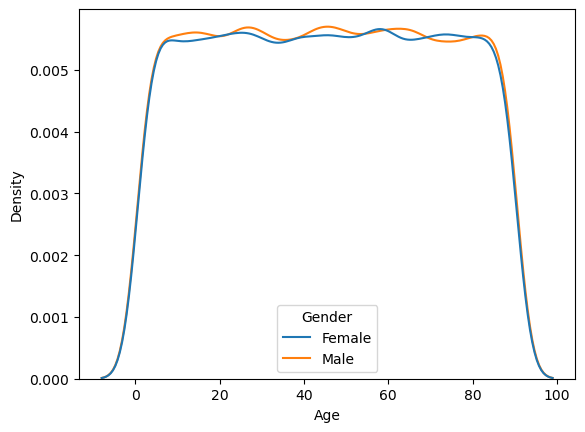

In [3]:
from seaborn import kdeplot
kdeplot(data=df, x='Age', hue='Gender')

This is a little surprising and sugggests this is a sample from a larger dataset chosen to have essentially equal age buckets.

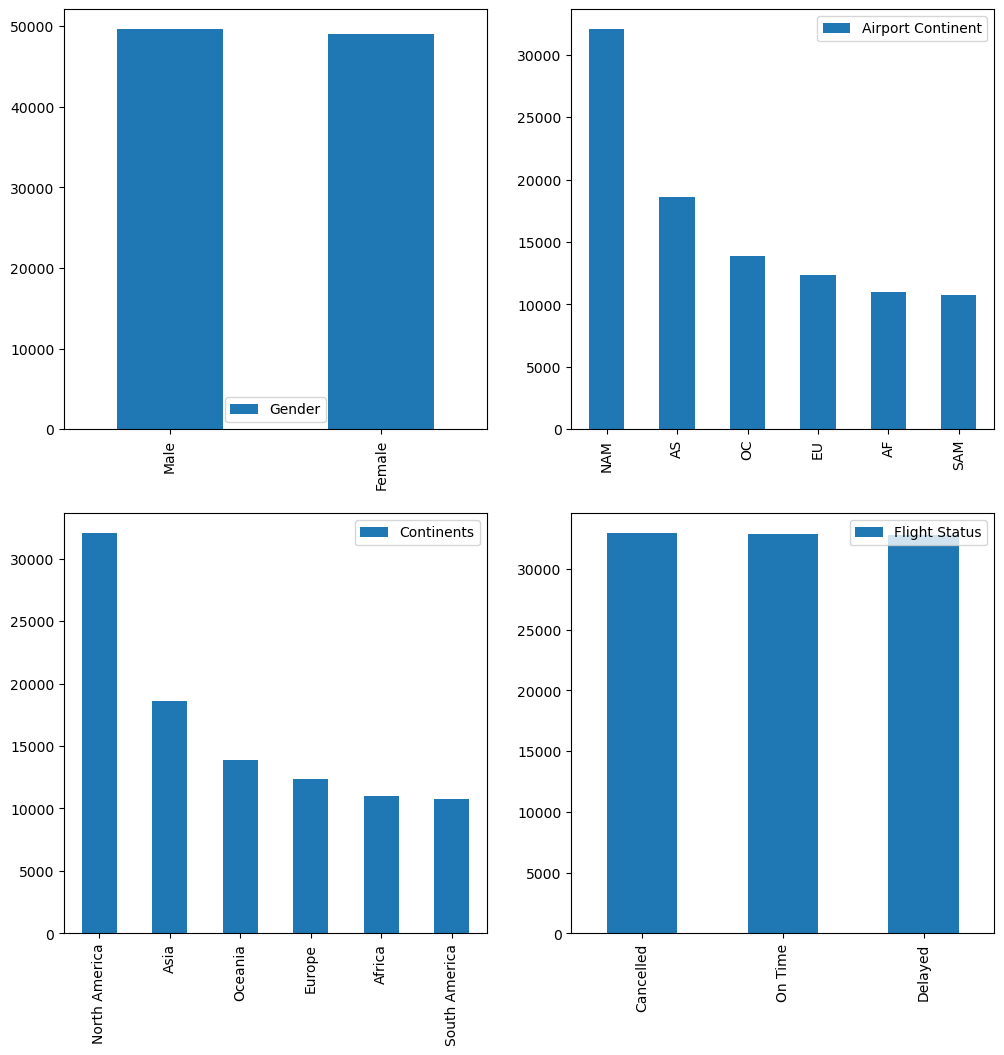

In [4]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 12), ncols=2, nrows=2,  )
columns = [key for key, value in df.nunique().to_dict().items() if value < 10]
for index, column in enumerate(columns):
    df[column].value_counts().plot(ax=ax.ravel()[index], kind='bar', legend=True)

<Axes: xlabel='Passenger ID', ylabel='Density'>

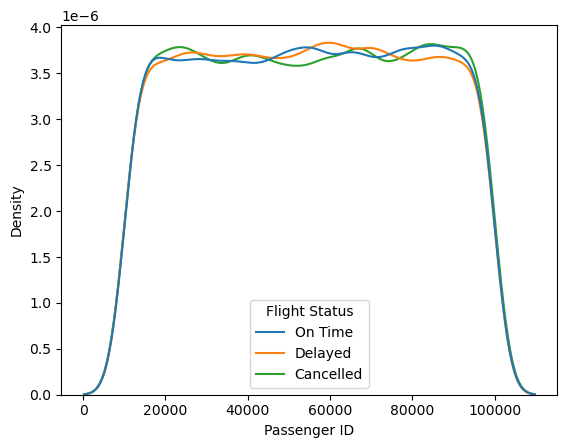

In [5]:
kdeplot(data=df, x='Passenger ID', hue='Flight Status')

Flight Status being uniformly distributed seems unlikely unless this is a carefully chosen sample from a larger population.

In [6]:
df['Departure Date'].dt.year.value_counts().to_frame()

,Departure Date
2022,98619


In [7]:
df['Last Name'].value_counts().to_frame().head(n=10)

,Last Name
Dyball,17
Capron,15
Ducker,13
Richfield,12
Danaher,11
Knight,10
Okenden,10
Dunbabin,10
Watkiss,10
Challenor,10


Chances are very good this is synthetic data.